<a href="https://colab.research.google.com/github/CBelleLopez/CSE151A_Proj/blob/main/Project_WriteUp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You can find a link to the dataset we are using [here](https://huggingface.co/datasets/julien-c/titanic-survival).

# Data Exploration

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv("hf://datasets/julien-c/titanic-survival/titanic.csv")

In [ ]:
data

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


## Data Preprocessing

In [ ]:
data = data.drop(columns = ['Name'])

In [ ]:
data['Sex'] = data['Sex'].map({'male': 1, 'female': 0})

In [ ]:
data.describe().round(2)

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.00,887.00,887.00,887.00,887.00,887.00,887.00
mean,0.39,2.31,0.65,29.47,0.53,0.38,32.31
std,0.49,0.84,0.48,14.12,1.10,0.81,49.78
min,0.00,1.00,0.00,0.42,0.00,0.00,0.00
25%,0.00,2.00,0.00,20.25,0.00,0.00,7.92
50%,0.00,3.00,1.00,28.00,0.00,0.00,14.45
75%,1.00,3.00,1.00,38.00,1.00,0.00,31.14
max,1.00,3.00,1.00,80.00,8.00,6.00,512.33


<Axes: ylabel='Count'>

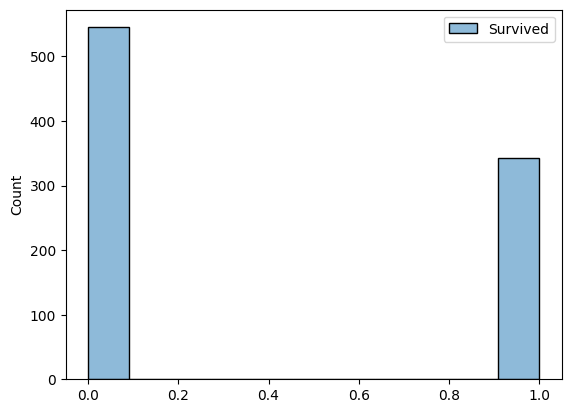

In [ ]:
sns.histplot(pd.DataFrame(data, columns = ['Survived']))

<Axes: ylabel='Count'>

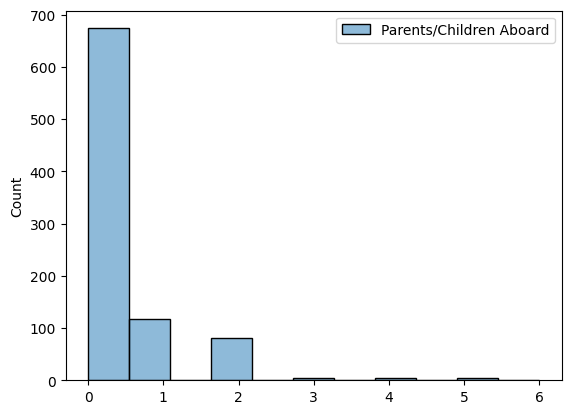

In [ ]:
sns.histplot(pd.DataFrame(data, columns = ['Parents/Children Aboard']))

<Axes: ylabel='Count'>

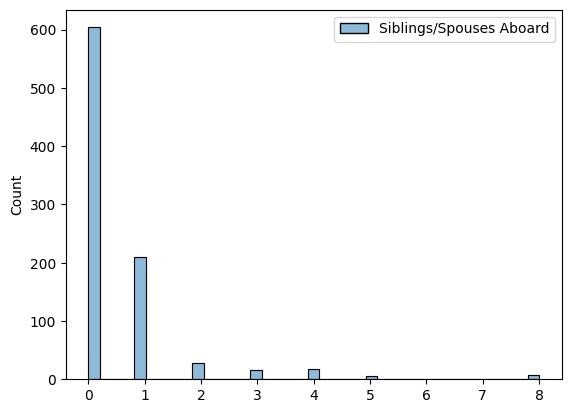

In [ ]:
sns.histplot(pd.DataFrame(data, columns = ['Siblings/Spouses Aboard']))

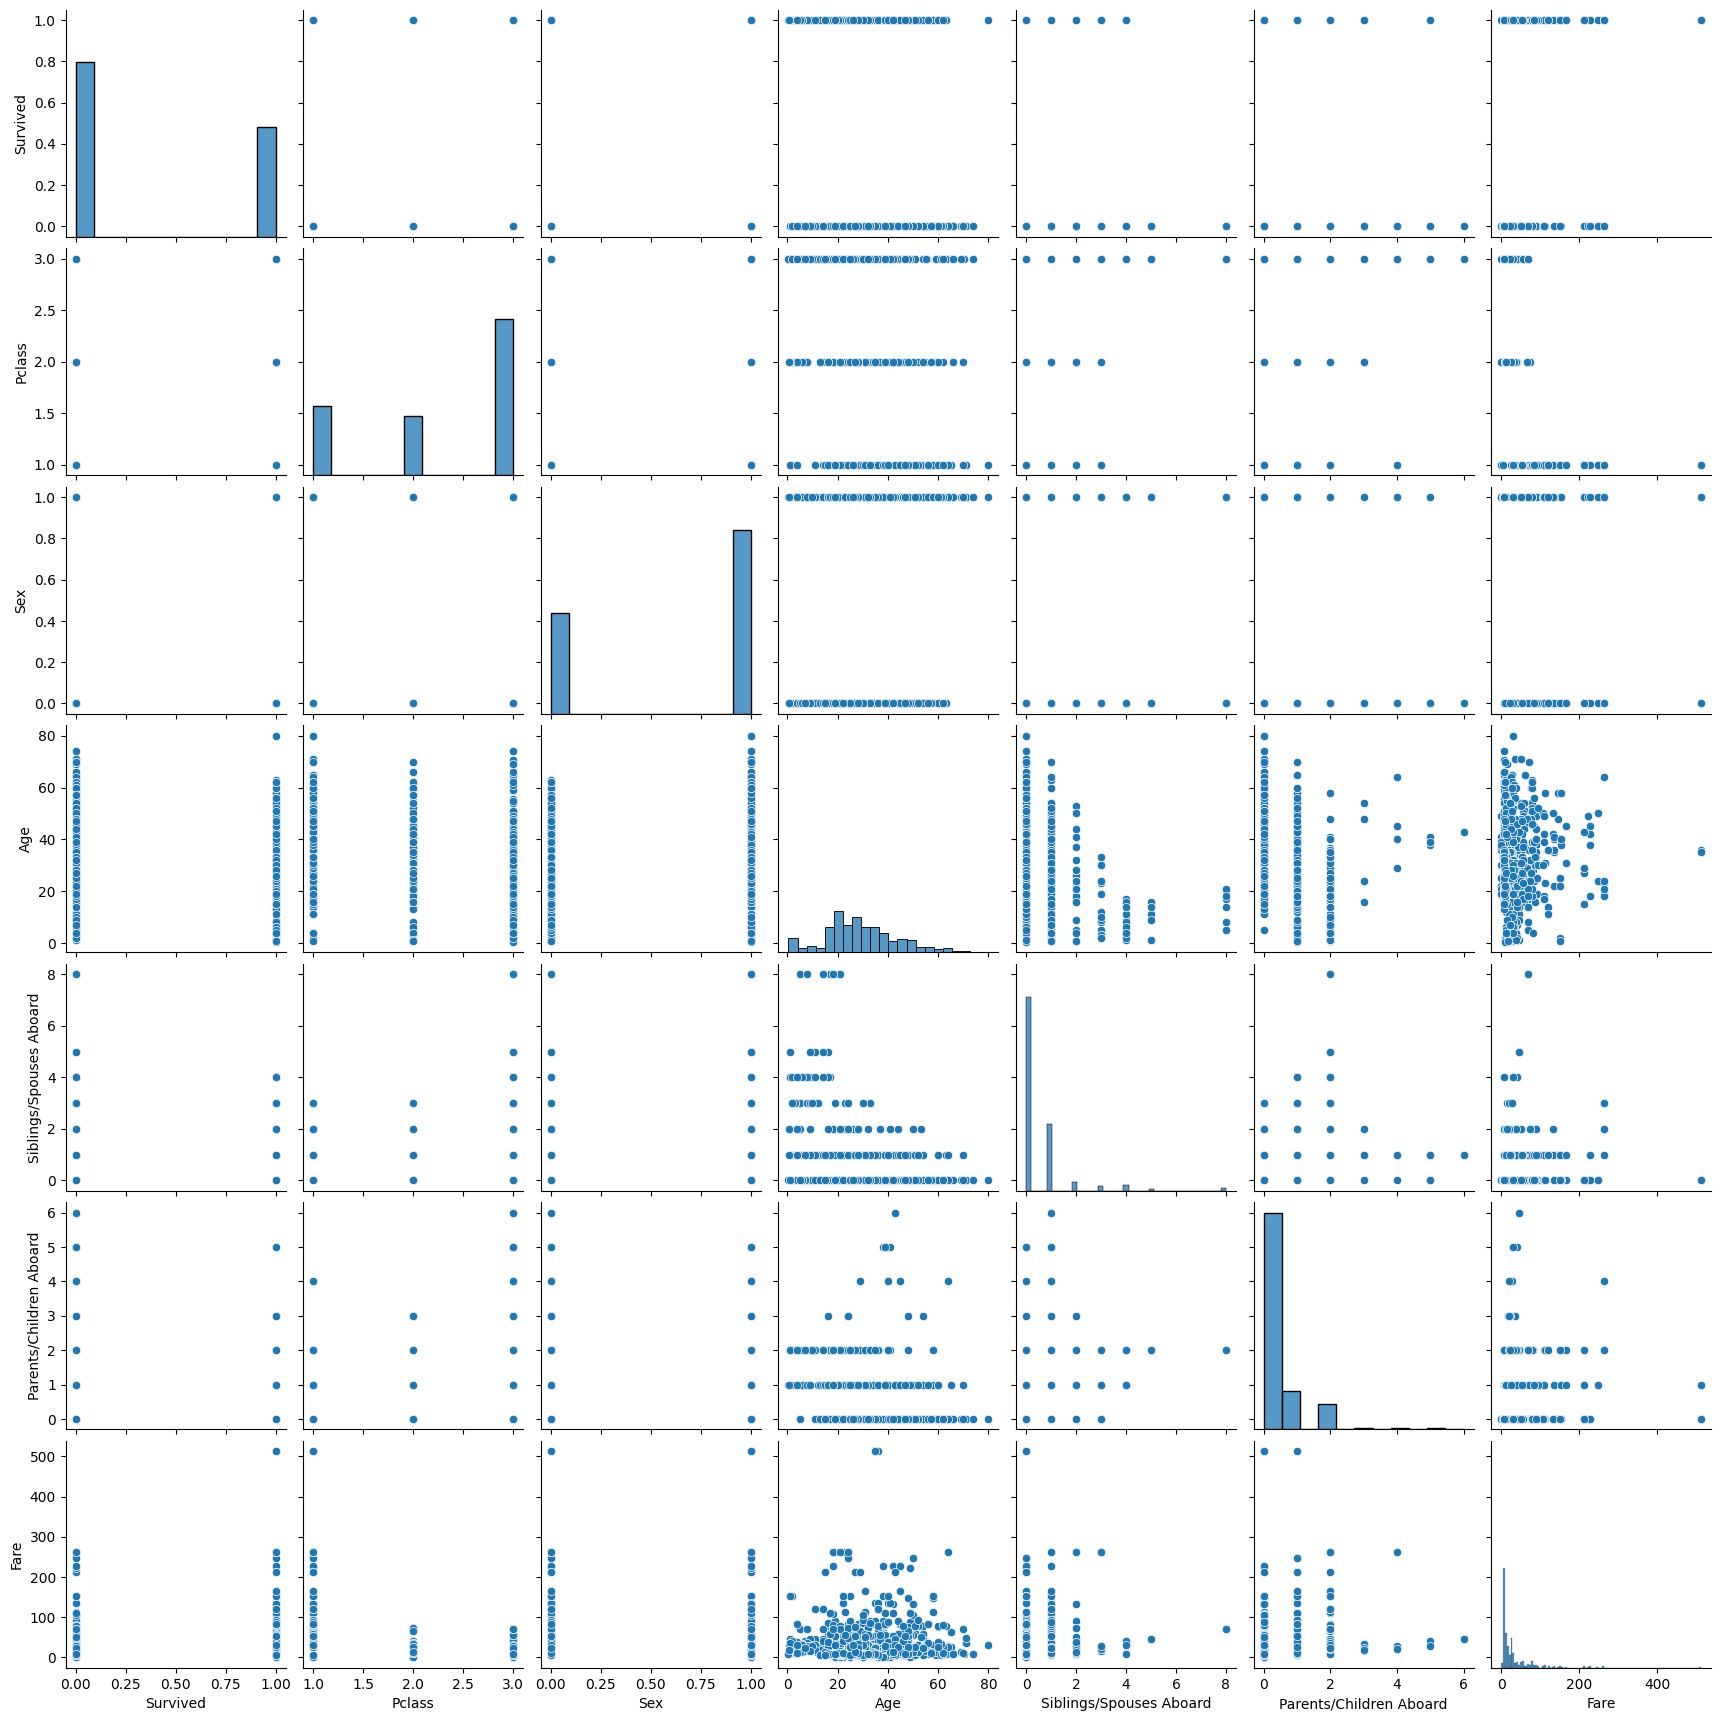

In [ ]:
sns.pairplot(data, diag_kind='auto')

In [ ]:
corr = data.corr()
corr

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Survived,1.000000,-0.336528,-0.542152,-0.059665,-0.037082,0.080097,0.256179
Pclass,-0.336528,1.000000,0.129507,-0.391492,0.085026,0.020252,-0.548919
Sex,-0.542152,0.129507,1.000000,0.091875,-0.113249,-0.244337,-0.181137
Age,-0.059665,-0.391492,0.091875,1.000000,-0.297669,-0.193741,0.112329
Siblings/Spouses Aboard,-0.037082,0.085026,-0.113249,-0.297669,1.000000,0.414244,0.158839
Parents/Children Aboard,0.080097,0.020252,-0.244337,-0.193741,0.414244,1.000000,0.215470
Fare,0.256179,-0.548919,-0.181137,0.112329,0.158839,0.215470,1.000000


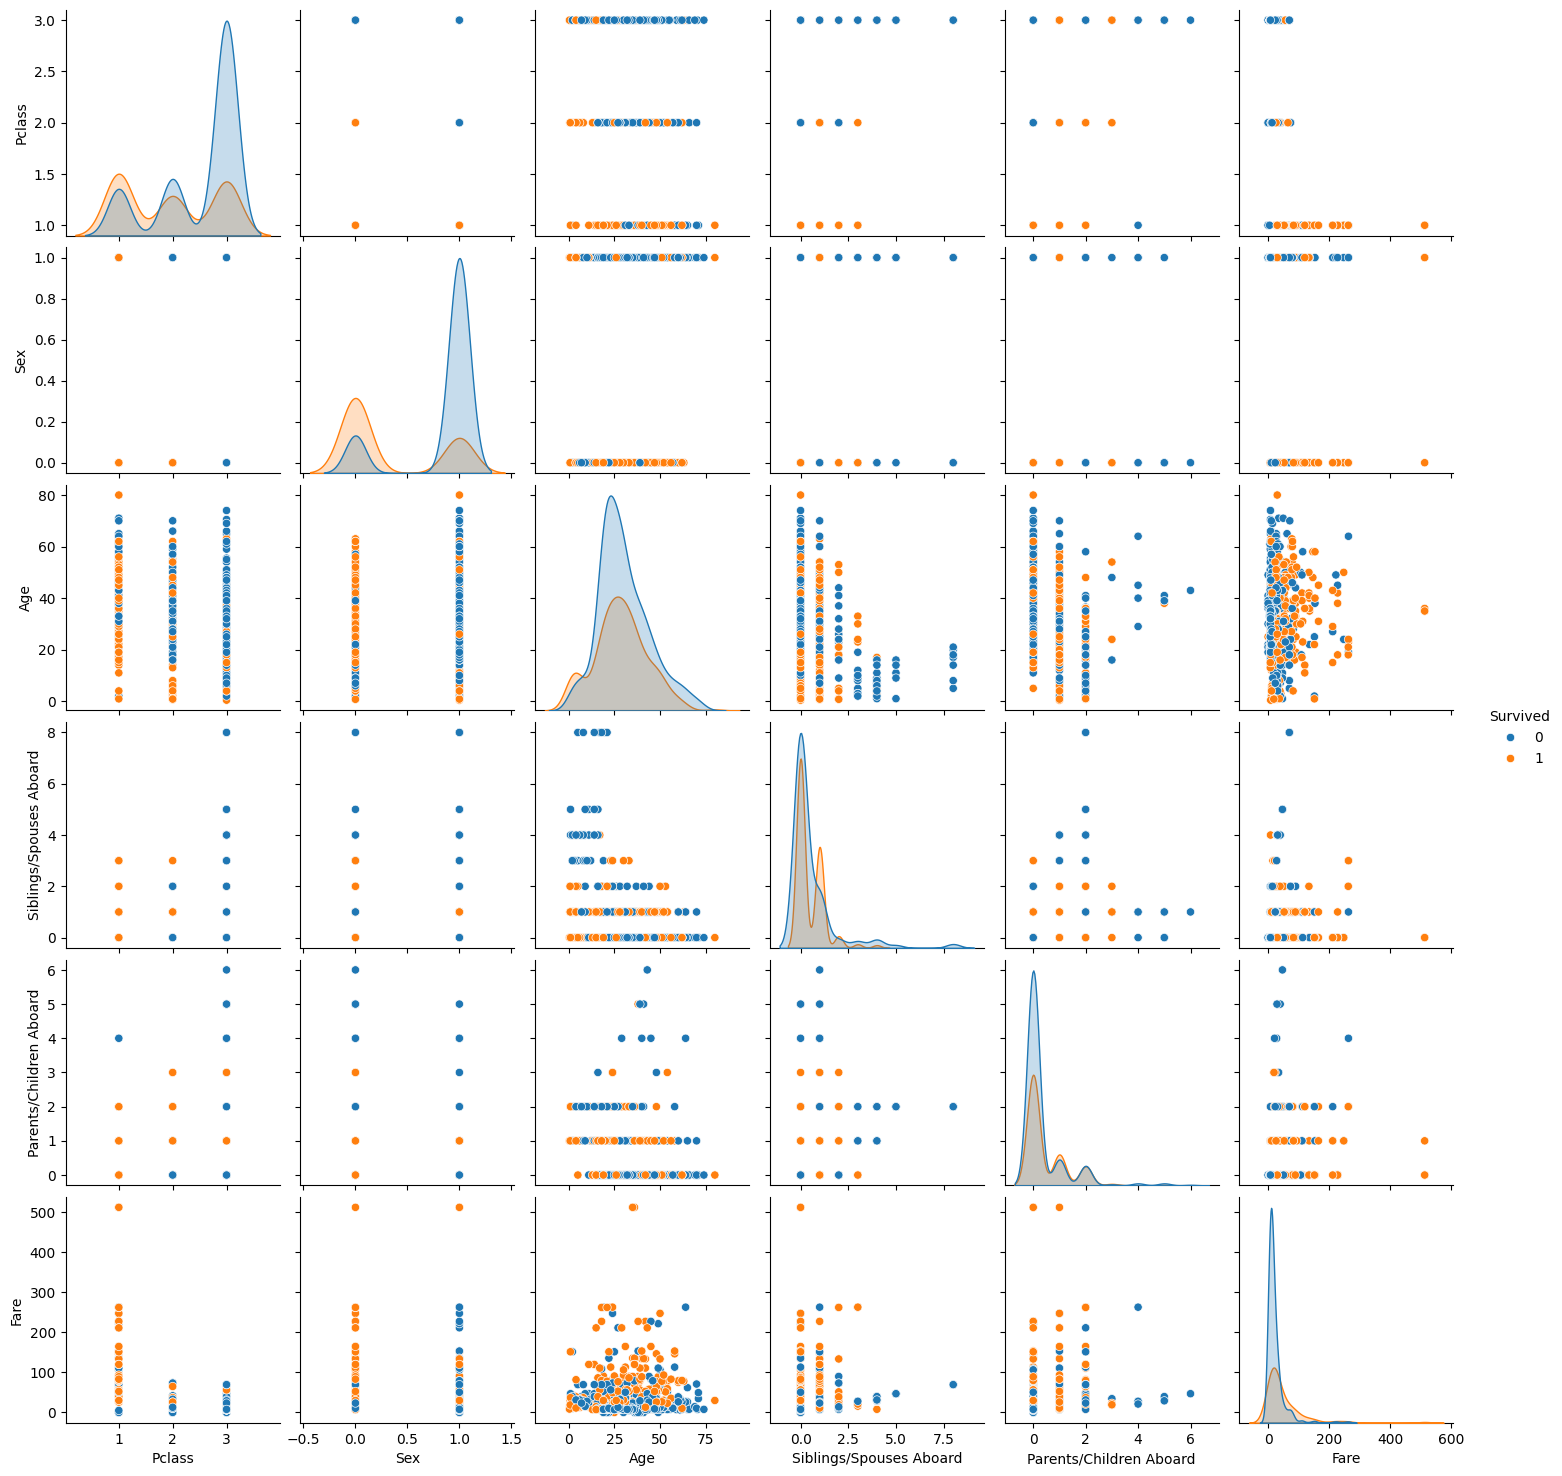

In [ ]:
sns.pairplot(data, hue = 'Survived', diag_kind='kde')

<Axes: >

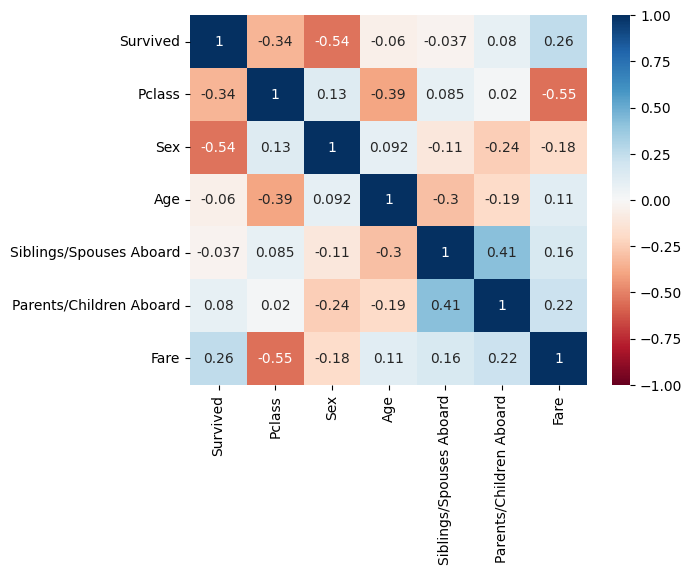

In [ ]:
sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')

# Pre-Processing

1: Finish Major Preprocessing: Finish major preprocessing, this includes scaling and/or transforming your data, imputing your data, encoding your data, feature expansion, Feature expansion (example is taking features and generating new features by transforming via polynomial, log multiplication of features).

2: Train your first model

3: Evaluate your model and compare training vs. test error

4: Answer the questions: Where does your model fit in the fitting graph? and What are the next models you are thinking of and why?

5: Update your README.md to include your new work and updates you have all added. Make sure to upload all code and notebooks. Provide links in your README.md

6: Conclusion section: What is the conclusion of your 1st model? What can be done to possibly improve it?

Please make sure preprocessing is complete and your first model has been trained. If you are doing supervised learning include example ground truth and predictions for train, validation and test.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
scaler = MinMaxScaler()

In [ ]:
datanorm = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [ ]:
datanorm = datanorm[datanorm['Fare'] != 0.0]

In [ ]:
datanorm.shape

(872, 7)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(datanorm.drop(['Survived'], axis=1), datanorm.Survived, test_size=0.2, random_state=21)

In [ ]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
yhat_test = logreg.predict(X_test)
yhat_train = logreg.predict(X_train)

In [ ]:
yhat_test

array([1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0.])

In [ ]:
yhat_train

array([0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1.,
       1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0.

In [ ]:
logreg.score(X_test, y_test)

0.84

In [ ]:
logreg.score(X_train, y_train)

0.7948350071736011

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87       103
         1.0       0.88      0.71      0.78        72

    accuracy                           0.84       175
   macro avg       0.85      0.82      0.83       175
weighted avg       0.84      0.84      0.84       175



<Axes: >

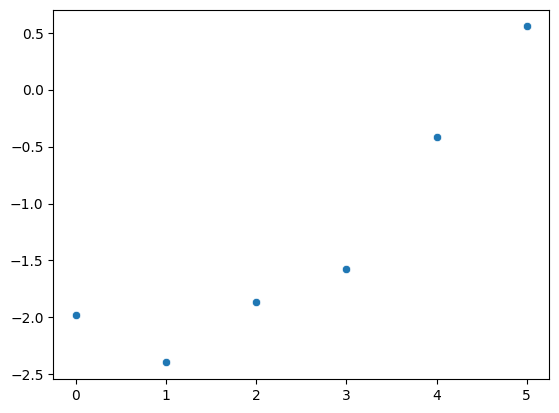

In [ ]:
sns.scatterplot(x = list(range(0,len(logreg.coef_[0]))),y = logreg.coef_[0])

In [ ]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

In [ ]:
logreg.coef_[0]

array([-1.97473591, -2.39580601, -1.86424977, -1.57858702, -0.41754964,
        0.55476151])

<Axes: xlabel='Sex', ylabel='Survived'>

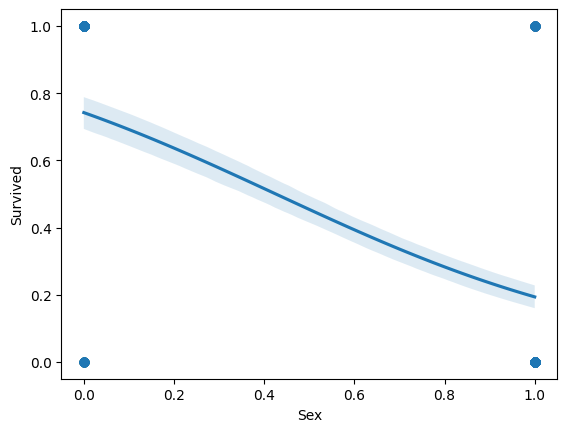

In [ ]:
sns.regplot(x=datanorm['Sex'], y=datanorm['Survived'], data=datanorm, logistic=True)

Good fit based on large coefficent and test/ training errors are similar

In [ ]:
datanorm.shape

(872, 7)

<Axes: xlabel='Pclass', ylabel='Survived'>

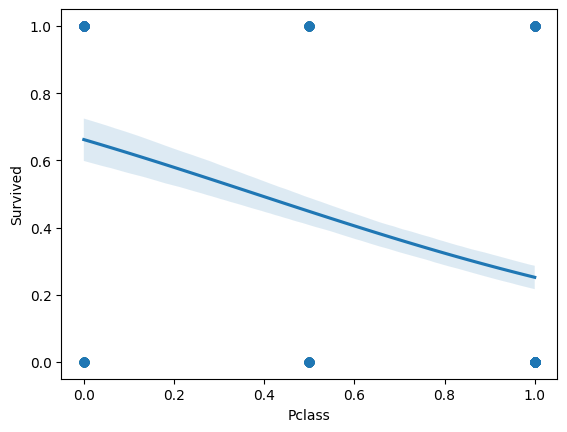

In [ ]:
sns.regplot(x=datanorm['Pclass'], y=datanorm['Survived'], data=datanorm, logistic=True)

<Axes: xlabel='Age', ylabel='Survived'>

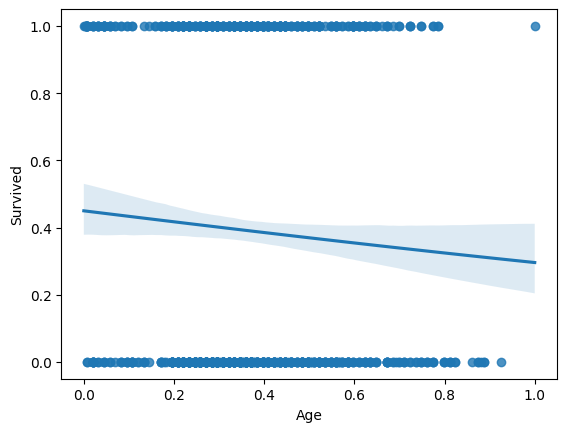

In [ ]:
sns.regplot(x=datanorm['Age'], y=datanorm['Survived'], data=datanorm, logistic=True)

In [ ]:
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X = datanorm.drop('Survived', axis=1)
y = datanorm['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression().fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_train_prob = model.predict_proba(X_train)[:, 1]
y_test_prob = model.predict_proba(X_test)[:, 1]
train_error = log_loss(y_train, y_train_prob)
test_error = log_loss(y_test, y_test_prob)
print(f"Training Log Loss: {train_error}")
print(f"Test Log Loss: {test_error}")

Training Log Loss: 0.4459923639738244
Test Log Loss: 0.43551066612848316
Training Accuracy: 0.7919655667144907
Test Accuracy: 0.8171428571428572


In [ ]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 0.7919655667144907
Test Accuracy: 0.8171428571428572


## 3. Evaluate your model and compare training vs. test error

Response: Our model is a logistic regression model where we using 'Survived' as our target variable in which we compared to the rest of the variables. Our training error and testing error were both fairly low and similar to each other where "0.4459923639738244" was our training error and "0.43551066612848316" was our testing error which is in the ideal range between 0 and 1. Since the training error and testing error were fairly low and similar to each other, this implies that our model is generalizable and performs well on our predictive values.


## 4. Where does your model fit in the fitting graph? and What are the next models you are thinking of and why?
According the the coefficents of age, Pclass, and sex, we can see that these coefficents are very large. Looking at the error of both the training and testing, we notice that these values are very small and close together making it in the ideal range. We could do classification as our next model because based on our target variable it has an outcome of 0 and 1 which makes it a binary classification problem.

## 6. Conclusion Section

What is the conclusion of your 1st model? What can be done to possibly improve it?

Response: